### 1.Data Analysis and Preprocessing
1.1 Handling Missing Values using advanced imputation techniques like KNN imputation or iterative imputation for missing data.

Remove rows with excessive missing values (e.g., >50% missing).

In [28]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load data
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
creditcard_data = pd.read_csv('../data/creditcard.csv')

# KNN Imputation for numerical columns
imputer = KNNImputer(n_neighbors=5)
fraud_data[['age', 'purchase_value']] = imputer.fit_transform(fraud_data[['age', 'purchase_value']])

# Drop rows with missing categorical data
fraud_data.dropna(subset=['device_id', 'browser'], inplace=True)

### 1.2 Data Cleaning
Remove duplicates and correct data types (e.g., timestamps).

In [29]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)
creditcard_data.drop_duplicates(inplace=True)

# Convert timestamps
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

### 1.3 Exploratory Data Analysis (EDA)
Perform univariate and bivariate analysis.

Visualize geolocation-based fraud distribution.

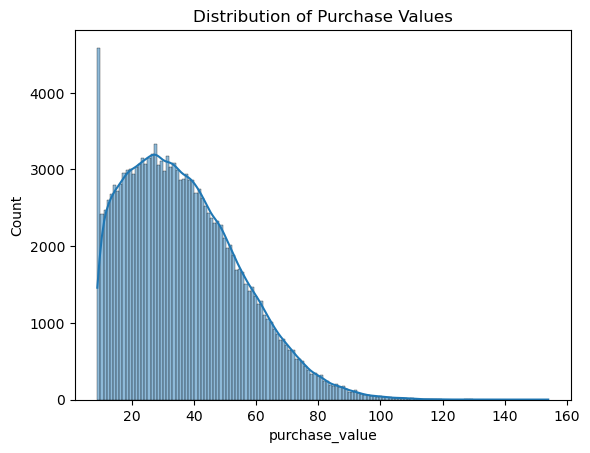

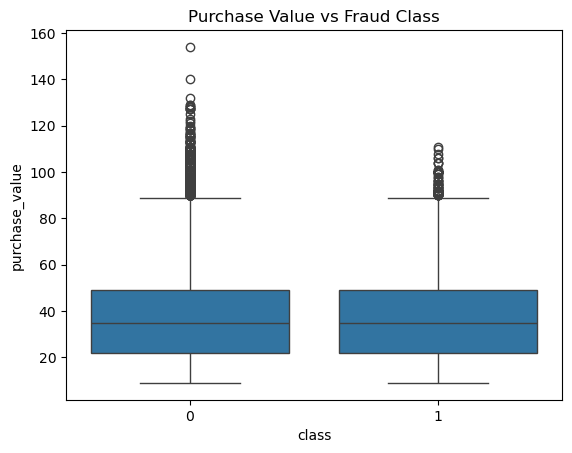

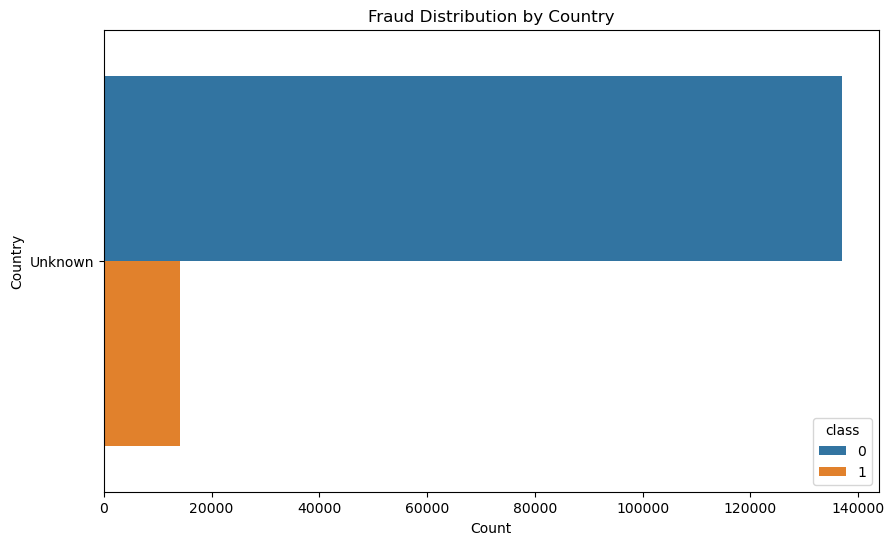

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Values')
plt.show()

# Bivariate analysis
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud Class')
plt.show()

# Geolocation-based fraud distributionmport ipaddress

# Create a simple mapping function for demo purposes
def get_country_from_ip(ip):
    try:
        # This is a simplified mapping for demonstration
        # In production, you should use a proper IP geolocation database
        ip_int = int(ipaddress.ip_address(ip))
        if ip_int < 1000000000:  # Arbitrary threshold
            return 'USA'
        elif ip_int < 2000000000:
            return 'Europe'
        elif ip_int < 3000000000:
            return 'Asia'
        else:
            return 'Other'
    except:
        return 'Unknown'

# Apply the mapping
fraud_data['country'] = fraud_data['ip_address'].apply(get_country_from_ip)

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(y='country', hue='class', data=fraud_data)
plt.title('Fraud Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### 1.4 Feature Engineering
Create time-based features (e.g., hour_of_day, day_of_week).

Analyze transaction frequency and velocity.

Encode categorical variables using target encoding or one-hot encoding.

In [19]:
# Convert purchase_time to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Optional: Add more time-based features if needed
fraud_data['month'] = fraud_data['purchase_time'].dt.month
fraud_data['is_weekend'] = fraud_data['day_of_week'].isin([5, 6]).astype(int)

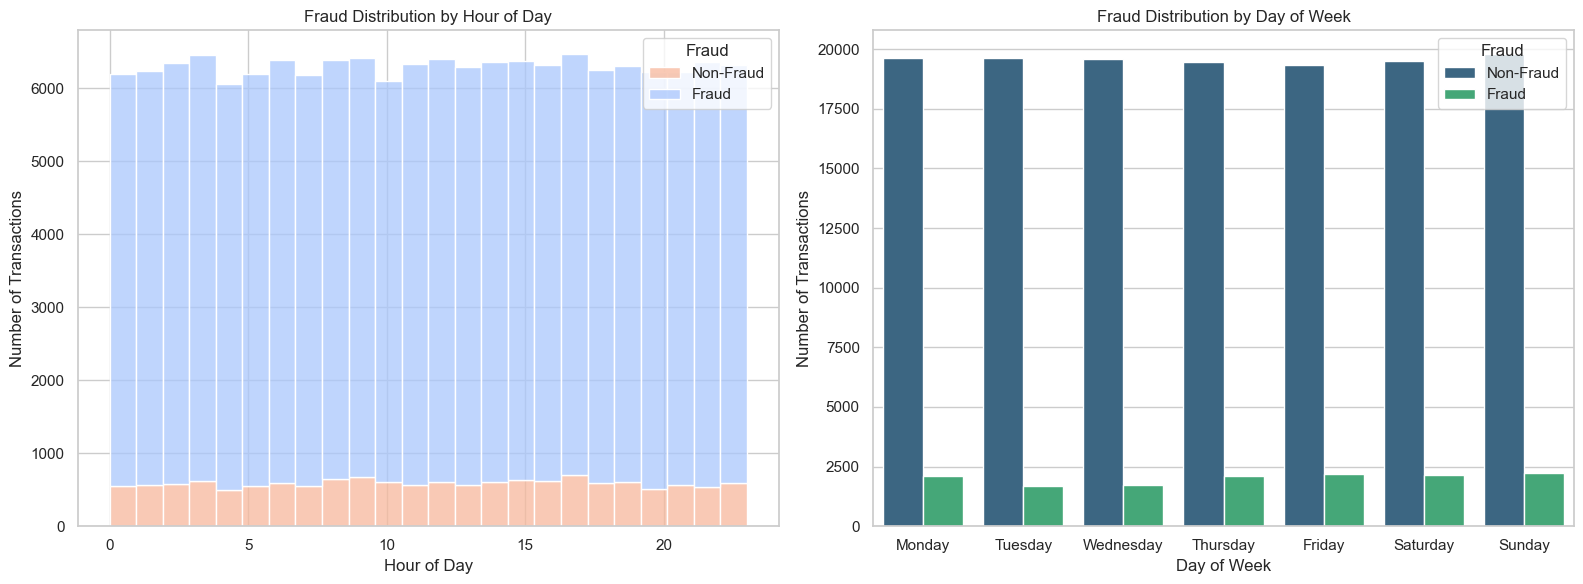

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert purchase_time to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['day_name'] = fraud_data['purchase_time'].dt.day_name()

# Set up the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Visualization 1: Fraud Distribution by Hour of Day
plt.subplot(1, 2, 1)
sns.histplot(data=fraud_data, x='hour_of_day', hue='class', multiple='stack', palette='coolwarm', bins=24)
plt.title('Fraud Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Visualization 2: Fraud Distribution by Day of Week
plt.subplot(1, 2, 2)
sns.countplot(data=fraud_data, x='day_name', hue='class', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraud Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])

# Adjust layout and display
plt.tight_layout()
plt.show()

### 1.5 Anomaly Detection
Use Isolation Forest to generate anomaly scores.

In [25]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
fraud_data['anomaly_score'] = iso_forest.fit_predict(fraud_data[['purchase_value', 'age']])

### Print the Anomaly Scores

In [22]:
print(fraud_data['anomaly_score'].head())  # Show the first few anomaly scores

0    1
1    1
2    1
3    1
4    1
Name: anomaly_score, dtype: int64


### Count the Number of Anomalies

In [23]:
print(fraud_data['anomaly_score'].value_counts())  # Count of normal (1) vs. anomalous (-1) points

anomaly_score
 1    149601
-1      1511
Name: count, dtype: int64


### Visualize the Anomalies

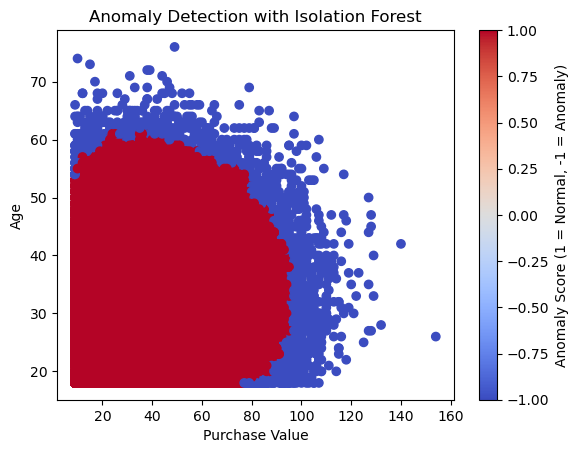

In [24]:
import matplotlib.pyplot as plt

plt.scatter(fraud_data['purchase_value'], fraud_data['age'], c=fraud_data['anomaly_score'], cmap='coolwarm')
plt.xlabel('Purchase Value')
plt.ylabel('Age')
plt.title('Anomaly Detection with Isolation Forest')
plt.colorbar(label='Anomaly Score (1 = Normal, -1 = Anomaly)')
plt.show()